In [7]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

In [12]:
def merge(a,b):
    c = []
    while (len(a) != 0 and len(b) != 0):
        
        if a[0] < b[0]:
            
            c.append(a[0])
            a.remove(a[0])
        else:
            c.append(b[0])
            b.remove(b[0])
    if len(a) == 0:
        c += b
    else:
        c += a
    return c

In [13]:
def mergesort(x):
  
    if len(x) == 0 or len(x) == 1:
        return x
    else:
        middle = len(x)/2
        a = mergesort(x[:middle])
        b = mergesort(x[middle:])
        return merge(a,b)

In [14]:
A=[5, 4, 6, 3, 7, 2, 8, 1]
A=mergesort(A)
print A

[1, 2, 3, 4, 5, 6, 7, 8]


<h4> Invariante</h4>

In [15]:
def invariante(A, copia):
    a = list(A)
    b = list(copia)
    b.sort()
    print "Checking ", A," -> ", copia
    return a == b

In [16]:
def inv_mergesort(A):
    lista = list(A)
    if len(A) < 2:
        return A

    edge = len(A)/2
    der = inv_mergesort(A[int(edge):])
    izq = inv_mergesort(A[:int(edge)])
    

    return inv_merge(izq, der, lista)

def inv_merge(izq, der, lista):
    i = 0
    j = 0
    A = []
    
    while (i < len(izq) and j < len(der)):
        if(izq[i] < der[j]):
            A.append(izq[i])
            i += 1
        else:
            A.append(der[j])
            j += 1
            
    A += izq[i:]
    A += der[j:]
    
    print invariante(A, lista)

    return A

In [17]:
A = [5, 4, 6, 3, 7, 2, 8, 1, 9]
A = inv_mergesort(A)
print A

Checking  [1, 9]  ->  [1, 9]
True
Checking  [1, 8, 9]  ->  [8, 1, 9]
True
Checking  [2, 7]  ->  [7, 2]
True
Checking  [1, 2, 7, 8, 9]  ->  [7, 2, 8, 1, 9]
True
Checking  [3, 6]  ->  [6, 3]
True
Checking  [4, 5]  ->  [5, 4]
True
Checking  [3, 4, 5, 6]  ->  [5, 4, 6, 3]
True
Checking  [1, 2, 3, 4, 5, 6, 7, 8, 9]  ->  [5, 4, 6, 3, 7, 2, 8, 1, 9]
True
[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [21]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_mergesort(x, acct):
  
    if len(x) == 0 or len(x) == 1:
        acct.count()
        return x
        acct.count()
    else:
        acct.count()
        middle = len(x)/2; acct.count()
        a = mergesort(x[:middle]); acct.count()
        b = mergesort(x[middle:]); acct.count()
        return acct_merge(a,b, acct); acct.count()
    
def acct_merge(a,b, acct):
    c = []
    acct.count()
    while (len(a) != 0 and len(b) != 0):
        acct.count()
        if a[0] < b[0]:
            acct.count()
            c.append(a[0]);acct.count()
            a.remove(a[0]);acct.count()
        else:
            c.append(b[0]);acct.count()
            b.remove(b[0]);acct.count()
    if len(a) == 0:
        acct.count()
        c += b;acct.count()
    else:
        c += a;acct.count()
    return c;acct.count()

<h4> Análisis Experimental</h4>

In [24]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_mergesort(l, acct)
        results.append(acct.steps)
    return results

In [25]:
import time

def time_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()#get start time
        acct_mergesort(l, acct)
        toc = time.clock()#get final time
        results.append((toc-tic)*1000000)
    return results

In [27]:
import random as ran

def operation_analisis(n):
    results=[]
    for i in range(n):
        if(i==0):
            a=0
        else:
            
            a = i*np.log2(i)
        results.append(a)
    
    return results

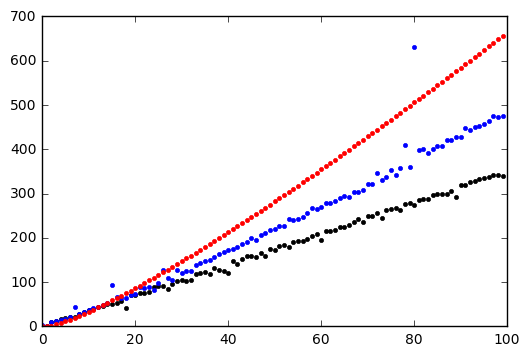

In [28]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')
y = np.array(time_analysis(100))
pl.plot(x, y, 'k.', color='b')
y = np.array(operation_analisis(100))
pl.plot(x, y, 'k.', color='r')